[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/tueda/mympltools/HEAD?labpath=examples/Examples.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tueda/mympltools/blob/HEAD/examples/Examples.ipynb)

In [1]:
# Install mympltools 22.5.1 when running on Binder/Colab.
! [ -n "$BINDER_SERVICE_HOST$(echo '{get_ipython()}' | grep 'google.colab')" ] && pip install "git+https://github.com/tueda/mympltools.git@22.5.1#egg=mympltools[fitting]"

## Basic style

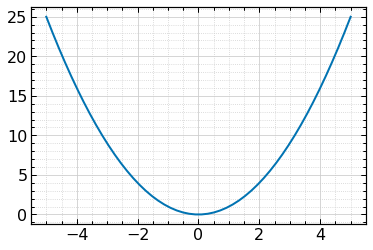

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import mympltools as mt

# Use the style.
mt.use("21.10")

x = np.linspace(-5, 5)

fig, ax = plt.subplots()
ax.plot(x, x**2)

# Show grid lines.
mt.grid(ax)

plt.show()

## Annotation text for lines

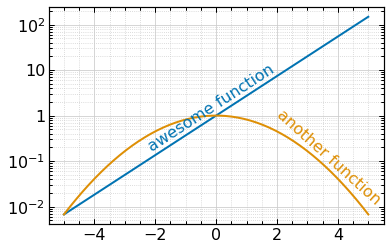

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import mympltools as mt

mt.use("21.10")

x = np.linspace(-5, 5)

fig, ax = plt.subplots()

# Plot a curve with an annotation.
l1 = ax.plot(x, np.exp(x))
mt.line_annotate("awesome function", l1)

# Plot another curve with an annotation.
l2 = ax.plot(x, np.exp(-0.2 * x**2))
mt.line_annotate("another function", l2, x=3.5)

ax.set_yscale("log")
mt.grid(ax)
plt.show()

To fine-tune the text position, use the `xytext` (default: `(0, 5)`) and `rotation` options.

## Handling uncertainties

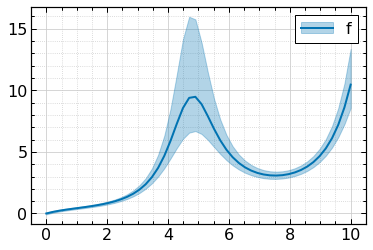

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import mympltools as mt

mt.use("21.10")

# Bounded(x, dx) represents a curve with a symmetric error bound.
x = np.linspace(0, 10)
y1 = mt.Bounded(x, 0.1)
y2 = mt.Bounded(1.5 + np.sin(x), 0.2)
y3 = y1 / y2  # The error bound of this result is not symmetric.

fig, ax = plt.subplots()

# Plot a curve with an error band.
a1 = mt.errorband(ax, x, y3.x, y3.err, label="f")
ax.legend([a1], ax.get_legend_handles_labels()[1])

mt.grid(ax)
plt.show()

## Curve fitting (SciPy wrapper)

Model(f=<function f at 0x7fa8cf738550>, popt=array([2.4167779 , 1.10284522, 0.47084201]), perr=array([0.09016611, 0.08578057, 0.04401175]), pcov=array([[ 0.00812993,  0.00311033, -0.00031362],
       [ 0.00311033,  0.00735831,  0.00297383],
       [-0.00031362,  0.00297383,  0.00193703]]), chi2=26.552835140540836, ndf=37, p_value=0.8984415249043353)


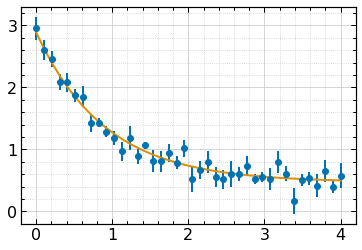

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import mympltools as mt

mt.use("21.10")

np.random.seed(1)

# Fitting function.
def f(x, a, b, c):
    return a * np.exp(-b * x) + c


# Data to be fitted.
n = 10
x = np.linspace(0, 4, 40)
y = []
e = []
for xi in x:
    di = np.zeros(n)
    di += f(xi, 2.5, 1.3, 0.5)
    di += np.random.randn(n) * 0.5  # noise
    yi = np.average(di)
    ei = np.std(di) / np.sqrt(n)
    y += [yi]
    e += [ei]

# Perform fitting.
model = mt.fit(f, x, y, e)
print(model)

# Plot with the fitted curve.
fig, ax = plt.subplots()
ax.errorbar(x, y, e, fmt="o")

ax.plot(x, model(x))

mt.grid(ax)
plt.show()

Model(f=<function fit_f at 0x7fa89c1a35b0>, popt=array([ -0.86471399,  45.84336458, -13.32141334, -13.80745103,
        -0.1723098 ,   0.98728099]), perr=array([0.89170822, 2.63256047, 0.97317695, 2.15310141, 0.0350562 ,
       0.01134052]), pcov=array([[ 7.95143543e-01, -1.20887505e+00,  3.49733979e-01,
         1.54541205e-01,  3.61744963e-03,  4.70726944e-04],
       [-1.20887505e+00,  6.93037463e+00, -2.50603781e+00,
         2.95356490e+00,  3.53801750e-02, -1.43118168e-03],
       [ 3.49733979e-01, -2.50603781e+00,  9.47073369e-01,
        -1.13066258e+00, -1.37041940e-02,  4.38089954e-04],
       [ 1.54541205e-01,  2.95356490e+00, -1.13066258e+00,
         4.63584569e+00,  5.29738409e-02, -1.15224975e-03],
       [ 3.61744963e-03,  3.53801750e-02, -1.37041940e-02,
         5.29738409e-02,  1.22893722e-03, -1.45002101e-05],
       [ 4.70726944e-04, -1.43118168e-03,  4.38089954e-04,
        -1.15224975e-03, -1.45002101e-05,  1.28607462e-04]]), chi2=58.92838606212506, ndf=54, p_val

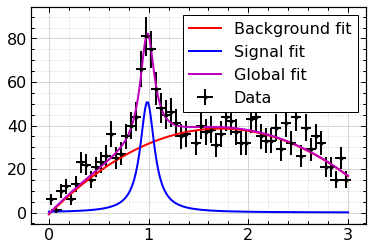

In [6]:
# Example taken from https://root.cern.ch/doc/v626/FittingDemo_8C.html

import matplotlib.pyplot as plt
import numpy as np

import mympltools as mt

mt.use("21.10")

# Data.
xdata = np.linspace(0, 3, 61)
xdata = (xdata[1:] + xdata[:-1]) / 2

ydata_str = """
 6,  1, 10, 12,  6, 13, 23, 22, 15, 21,
23, 26, 36, 25, 27, 35, 40, 44, 66, 81,
75, 57, 48, 45, 46, 41, 35, 36, 53, 32,
40, 37, 38, 31, 36, 44, 42, 37, 32, 32,
43, 44, 35, 33, 33, 39, 29, 41, 32, 44,
26, 39, 29, 35, 32, 21, 21, 15, 25, 15
"""
ydata = [float(s) for s in ydata_str.split(",")]

edata = np.sqrt(ydata)

# Fitting function.
def background(x, c0, c1, c2):
    return c0 + c1 * x + c2 * x**2


def signal(x, a0, a1, a2):
    return 0.5 * a0 * a1 / np.pi / ((x - a2) ** 2 + 0.25 * a1**2)


def fit_f(x, c0, c1, c2, a0, a1, a2):
    return background(x, c0, c1, c2) + signal(x, a0, a1, a2)


# Perform fitting.
model = mt.fit(fit_f, xdata, ydata, edata, p0=(1, 1, 1, 1, 0.2, 1))
print(model)

# Plot with the fitted curve.
fig, ax = plt.subplots()
ax.errorbar(xdata, ydata, edata, (x[1] - x[0]) / 2, ".", c="k", label="Data")

x = np.linspace(0, 3, 200)
ax.plot(x, background(x, *model.popt[0:3]), c="r", label="Background fit")
ax.plot(x, signal(x, *model.popt[3:6]), c="b", label="Signal fit")
ax.plot(x, model(x), c="m", label="Global fit")

ax.legend()
mt.grid(ax)
plt.show()